In [1]:
import os
import json
import pandas as pd

def find_and_extract_json(base_path):
    """
    Searches for AF3_JSON files containing '_summary_confidences_' in their name inside all directories,
    extracts specific metrics, and stores them in a DataFrame.
    """
    data_list = []
    
    # Iterate through all directories inside the base path
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        
        if os.path.isdir(folder_path):  # Check if it is a directory
            for file in os.listdir(folder_path):
                # Look for files containing '_summary_confidences_' and ending with .json
                if "_summary_confidences_" in file and file.endswith(".json"):
                    file_path = os.path.join(folder_path, file)
                    
                    # Open and read the JSON file
                    with open(file_path, "r") as f:
                        data = json.load(f)
                        
                        # Extract relevant values if they exist
                        if all(key in data for key in ["chain_iptm", "chain_pair_pae_min", "chain_ptm", "iptm", "ptm"]):
                            name = file.replace("_summary_confidences_", "_model_").replace(".json", "")
                            chain_iptm_A, chain_iptm_B = data["chain_iptm"]
                            chain_ptm_A, chain_ptm_B = data["chain_ptm"]
                            chain_pair_pae_min_AB = data["chain_pair_pae_min"][0][1]
                            chain_pair_pae_min_BA = data["chain_pair_pae_min"][1][0]
                            iptm = data["iptm"]
                            ptm = data["ptm"]
                            
                            # Append the data to the list
                            data_list.append([name, iptm, ptm, chain_iptm_A, chain_iptm_B, chain_ptm_A, chain_ptm_B, chain_pair_pae_min_AB, chain_pair_pae_min_BA])
    
    # Create DataFrame with reordered columns
    columns = ["name", "iptm", "ptm", "chain_iptm_A", "chain_iptm_B", "chain_ptm_A", "chain_ptm_B", "chain_pair_pae_min_AB", "chain_pair_pae_min_BA"]
    df = pd.DataFrame(data_list, columns=columns)
    return df

if __name__ == "__main__":
    # Define the base directory (use current working directory for Jupyter compatibility)
    base_directory = os.getcwd()
    
    # Find and extract relevant data
    df_results = find_and_extract_json(base_directory)
    
    # Save DataFrame to CSV
    output_path = os.path.join(base_directory, "extracted_pae_data.csv")
    df_results.to_csv(output_path, index=False)
    
    print(f"Extracted data saved in {output_path}")


Extracted data saved in ...Project_2\AF_3_ronda_1\extracted_pae_data.csv


In [2]:
# Calculates the average of the two chain pair PAE minimum values
df_results['chain_pair_pae_min_average'] = df_results[['chain_pair_pae_min_AB', 'chain_pair_pae_min_BA']].mean(axis=1)
df_results.head(10)

,name,iptm,ptm,chain_iptm_A,chain_iptm_B,chain_ptm_A,chain_ptm_B,chain_pair_pae_min_AB,chain_pair_pae_min_BA,chain_pair_pae_min_average
0,fold_binder_11_top_1_model_0,0.29,0.66,0.29,0.29,0.62,0.81,8.30,7.12,7.710
1,fold_binder_11_top_1_model_1,0.20,0.62,0.20,0.20,0.60,0.80,10.05,8.82,9.435
2,fold_binder_11_top_1_model_2,0.19,0.63,0.19,0.19,0.61,0.81,12.65,9.75,11.200
3,fold_binder_11_top_1_model_3,0.18,0.62,0.18,0.18,0.62,0.80,13.08,9.97,11.525
4,fold_binder_11_top_1_model_4,0.17,0.61,0.17,0.17,0.60,0.80,13.26,9.85,11.555
5,fold_binder_11_top_2_model_0,0.60,0.78,0.60,0.60,0.52,0.87,4.56,3.59,4.075
6,fold_binder_11_top_2_model_1,0.59,0.76,0.59,0.59,0.49,0.86,4.81,3.85,4.330
7,fold_binder_11_top_2_model_2,0.55,0.76,0.55,0.55,0.49,0.87,5.35,4.03,4.690
8,fold_binder_11_top_2_model_3,0.55,0.75,0.55,0.55,0.47,0.86,4.87,4.03,4.450
9,fold_binder_11_top_2_model_4,0.51,0.76,0.51,0.51,0.48,0.87,5.29,4.26,4.775


**FILTERING**

In [3]:
# Filter the values with iPTM >= 0.6 and chain_iptm_A > 0.5.
df_filtered = df_results[(df_results["iptm"] >= 0.6) & (df_results["chain_ptm_A"] > 0.5)].copy()
df_filtered.sort_values(by=["chain_pair_pae_min_average"], ascending=True, inplace=True)
df_filtered

,name,iptm,ptm,chain_iptm_A,chain_iptm_B,chain_ptm_A,chain_ptm_B,chain_pair_pae_min_AB,chain_pair_pae_min_BA,chain_pair_pae_min_average
95,fold_binder_15_top_5_model_0,0.85,0.89,0.85,0.85,0.76,0.87,1.02,1.14,1.080
96,fold_binder_15_top_5_model_1,0.84,0.88,0.84,0.84,0.76,0.87,1.07,1.19,1.130
98,fold_binder_15_top_5_model_3,0.83,0.87,0.83,0.83,0.76,0.86,1.10,1.21,1.155
97,fold_binder_15_top_5_model_2,0.84,0.88,0.84,0.84,0.76,0.86,1.09,1.24,1.165
99,fold_binder_15_top_5_model_4,0.83,0.87,0.83,0.83,0.76,0.86,1.11,1.24,1.175
211,fold_binder_8_top_3_model_1,0.78,0.83,0.78,0.78,0.83,0.85,1.43,1.47,1.450
214,fold_binder_8_top_3_model_4,0.77,0.82,0.77,0.77,0.82,0.85,1.48,1.50,1.490
212,fold_binder_8_top_3_model_2,0.78,0.83,0.78,0.78,0.83,0.86,1.55,1.51,1.530
210,fold_binder_8_top_3_model_0,0.78,0.83,0.78,0.78,0.83,0.85,1.50,1.57,1.535
213,fold_binder_8_top_3_model_3,0.77,0.82,0.77,0.77,0.82,0.85,1.54,1.55,1.545


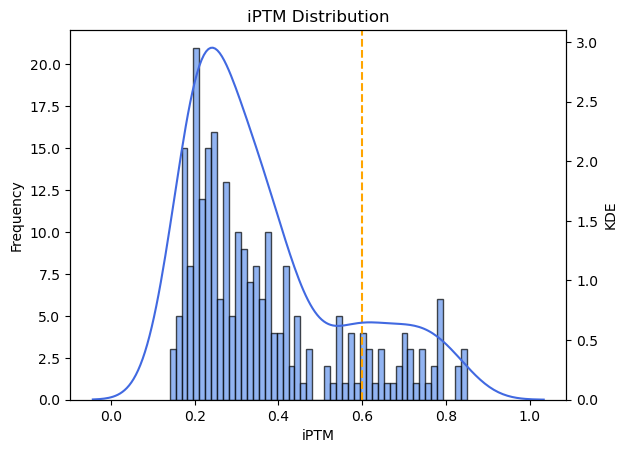

In [4]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, ax1 = plt.subplots()

# Plot iPTM distribution
ax1.hist(df_results['iptm'], bins=50, color='cornflowerblue',  edgecolor = 'black', alpha=0.7, label='iPTM')
ax1.set_title('iPTM Distribution')  
ax1.set_xlabel('iPTM')
ax1.set_ylabel('Frequency')

# Threshold line
plt.axvline(x = 0.6, color = 'orange', linestyle='--', label='0.6')

# Plot KDE on the same axis
import seaborn as sns
ax2 = ax1.twinx() 
sns.kdeplot(df_results['iptm'], color='royalblue', ax=ax2, label='KDE iPTM')
ax2.set_ylabel('KDE')
ax2.tick_params(axis='y')


#plt.savefig("iPTM_round_1.png", dpi=600)
plt.show()